< Convolutional Neural Network - Restore >
=================================================
Loading an image with matplotlib.image
----------------------

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
import os

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
n_classes = 10
batch_size = 128

x = tf.placeholder('float', [None, 784], name = 'x_')
y = tf.placeholder('float', name = 'y_')

keep_rate = 0.8
keep_prob = tf.placeholder(tf.float32, name = 'prob')

In [3]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME', name='conv2d')

In [4]:
def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME' , name = 'maxpool2d')

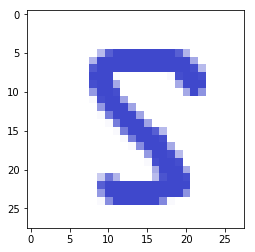

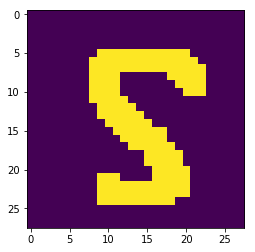

In [5]:
# load an image(28 x 28)
img1 = mpimg.imread( "/Users/moonsooyoung/Downloads/5-2.png")
plt.imshow(img1, cmap='Greys', interpolation='nearest')
plt.show()

image1=np.array(img1,np.float32)
image1[image1[:,:]<1]=0

data1=image1[:,:,2]
data1[data1[:,:]==0]=255
data1[data1[:,:]==1]=0

plt.imshow(data1)
plt.show()

data=data1.reshape(-1,784)
data= data/255

x=tf.cast(data, 'float')

In [6]:
weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32]), name = 'w_c1'),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64]), name = 'w_c2'),
               'W_fc':tf.Variable(tf.random_normal([7*7*64,1024]), name = 'w_f'),
               'out':tf.Variable(tf.random_normal([1024, n_classes]), name ='w_out')}

biases = {'b_conv1':tf.Variable(tf.random_normal([32]), name = 'b_c1'),
               'b_conv2':tf.Variable(tf.random_normal([64]), name = 'b_c2'),
               'b_fc':tf.Variable(tf.random_normal([1024]), name = 'b_f'),
               'out':tf.Variable(tf.random_normal([n_classes]), name = 'b_out')}

In [7]:
save_path = 'pyhelp/'
model_name = 'sy2'
if not os.path.exists(save_path):
    os.makedirs(save_path)

save_path_full = os.path.join(save_path, model_name)

sess= tf.Session()
saver = tf.train.Saver()
saver = tf.train.import_meta_graph('/Users/moonsooyoung/Desktop/pyhelp/sy2.meta')
saver.restore(sess,save_path_full)

INFO:tensorflow:Restoring parameters from pyhelp/sy2


In [8]:
x = tf.reshape(x, shape=[-1, 28, 28, 1])
conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'] , name = 'c1_')
conv1 = maxpool2d(conv1)
    
conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'], name = 'c2_')
conv2 = maxpool2d(conv2)

fc = tf.reshape(conv2,[-1, 7*7*64])
fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'], name = 'fc_')
fc = tf.nn.dropout(fc, keep_rate, name = 'fc')

output = tf.matmul(fc, weights['out'])+biases['out']

In [9]:
print(sess.run(output))
print('=========================================')
print(sess.run(tf.argmax(output,1)))

[[-16616.4921875    5756.91943359   4426.3203125   10798.69140625
   -9118.48632812  31965.54296875 -12503.71875    -29028.97851562
   20575.37695312  10979.08398438]]
[5]
